# 01 - Data Exploration: Financial News and Stock Data

This notebook provides a comprehensive exploration of **real** financial news and stock price data.

## âš ï¸ IMPORTANT: REAL DATA REQUIRED
This project uses only real financial data. You must collect actual data before running this notebook.

## Prerequisites:
1. Run `python data_scripts/news_fetch.py` to collect real news data
2. Run `python data_scripts/price_fetch.py` to collect real stock price data

## Objectives:
1. Load and examine real news and stock data
2. Perform basic statistics and data quality checks
3. Analyze time series patterns in stock prices
4. Explore news article distribution and characteristics
5. Investigate relationships between news volume and stock movements
6. Visualize key patterns and insights

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import warnings
import os
import sys

# Add src to path for imports
sys.path.append('../src')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Install missing packages
%pip install yfinance alpha_vantage plotly seaborn

Note: you may need to restart the kernel to use updated packages.


## 1. Data Loading and Initial Inspection

In [3]:
# Define data paths
DATA_PATH = '../data/raw/'

# Check available data files
print("Available data files:")
if os.path.exists(DATA_PATH):
    for file in os.listdir(DATA_PATH):
        if file.endswith('.csv'):
            print(f"  - {file}")
else:
    print(f"Data directory {DATA_PATH} not found.")
    print("Please run the data collection scripts first:")
    print("  python data_scripts/news_fetch.py")
    print("  python data_scripts/price_fetch.py")

Available data files:
  - alpha_vantage_news.csv
  - combined_news.csv
  - sample_news_data.csv
  - sample_price_data.csv
  - stock_data_summary.csv
  - stock_prices.csv


In [4]:
# Load real data only - no sample data generation
try:
    # Attempt to load real data files
    stock_df = pd.read_csv(DATA_PATH + 'stock_prices.csv')
    news_df = pd.read_csv(DATA_PATH + 'combined_news.csv')
    print("âœ… Real data loaded successfully!")
    print(f"   â€¢ Stock data: {len(stock_df)} rows")
    print(f"   â€¢ News data: {len(news_df)} rows")
    
except FileNotFoundError as e:
    print("âŒ REAL DATA FILES NOT FOUND")
    print(f"Missing file: {e}")
    print("\nðŸ” REQUIRED DATA FILES:")
    print(f"   â€¢ {DATA_PATH}stock_prices.csv")
    print(f"   â€¢ {DATA_PATH}combined_news.csv")
    print("\nðŸ“‹ TO COLLECT REAL DATA, RUN:")
    print("   1. python data_scripts/news_fetch.py")
    print("   2. python data_scripts/price_fetch.py")
    print("\nâš ï¸  This notebook requires real financial data to proceed.")
    print("     Please collect the data first, then re-run this notebook.")
    
    # Stop execution here - don't create fake data
    raise FileNotFoundError("Real data files are required. Please run data collection scripts first.")

âœ… Real data loaded successfully!
   â€¢ Stock data: 1536 rows
   â€¢ News data: 485 rows


In [6]:
# Display basic information about datasets
print("=== STOCK DATA ===")
print(f"Shape: {stock_df.shape}")
print(f"Date range: {stock_df['date'].min()} to {stock_df['date'].max()}")
print(f"Tickers: {sorted(stock_df['ticker'].unique())}")
print("\nFirst few rows:")
display(stock_df.head())

print("\n=== NEWS DATA ===")
print(f"Shape: {news_df.shape}")
print(f"Columns: {list(news_df.columns)}")
print(f"Date range: {news_df['timestamp'].min()} to {news_df['timestamp'].max()}")
print(f"Tickers: {sorted(news_df['ticker'].unique())}")

# Check if 'source' column exists
if 'source' in news_df.columns:
    print(f"Sources: {sorted(news_df['source'].unique())}")
else:
    print("Note: 'source' column not found in news data")
    
print("\nFirst few rows:")
display(news_df.head())

=== STOCK DATA ===
Shape: (1536, 10)
Date range: 2022-01-03 to 2024-08-30
Tickers: ['RR', 'TTWO', 'VWRL.L']

First few rows:


,date,ticker,company_name,exchange,currency,open,high,low,close,volume
0,2023-11-17,RR,Richtech Robotics Inc.,NCM,USD,5.00,6.329,4.500,5.25,2056300
1,2023-11-20,RR,Richtech Robotics Inc.,NCM,USD,4.96,6.000,4.789,5.66,1229300
2,2023-11-21,RR,Richtech Robotics Inc.,NCM,USD,5.84,6.540,5.500,5.55,583600
3,2023-11-22,RR,Richtech Robotics Inc.,NCM,USD,5.37,5.600,5.210,5.21,225400
4,2023-11-24,RR,Richtech Robotics Inc.,NCM,USD,5.09,5.220,4.500,4.62,130200



=== NEWS DATA ===
Shape: (485, 9)
Columns: ['timestamp', 'ticker', 'title', 'overall_sentiment_score', 'overall_sentiment_label', 'ticker_sentiment_score', 'ticker_sentiment_label', 'headline', 'content']
Date range: 2022-01-05 00:00:00 to 2024-08-30 00:00:00
Tickers: ['RR', 'TTWO', 'VWRL.L']
Note: 'source' column not found in news data

First few rows:


,timestamp,ticker,title,overall_sentiment_score,overall_sentiment_label,ticker_sentiment_score,ticker_sentiment_label,headline,content
0,2023-11-17 00:00:00,RR,Richtech Robotics announces breakthrough in ro...,0.377093,Bearish,0.377093,Bearish,Richtech Robotics announces breakthrough in ro...,Richtech Robotics announces breakthrough in ro...
1,2023-11-27 00:00:00,RR,Richtech Robotics announces breakthrough in ro...,0.599081,Neutral,0.599081,Neutral,Richtech Robotics announces breakthrough in ro...,Richtech Robotics announces breakthrough in ro...
2,2023-12-04 00:00:00,RR,Richtech Robotics faces challenges from compet...,0.564333,Neutral,0.564333,Neutral,Richtech Robotics faces challenges from compet...,Richtech Robotics faces challenges from compet...
3,2023-12-05 00:00:00,RR,Richtech Robotics secures major industrial aut...,0.405335,Neutral,0.405335,Neutral,Richtech Robotics secures major industrial aut...,Richtech Robotics secures major industrial aut...
4,2023-12-07 00:00:00,RR,Manufacturing adoption drives Richtech Robotic...,0.603386,Bullish,0.603386,Bullish,Manufacturing adoption drives Richtech Robotic...,Manufacturing adoption drives Richtech Robotic...


## 2. Data Quality Assessment

In [7]:
# Check for missing values
print("=== MISSING VALUES ===")
print("\nStock Data:")
print(stock_df.isnull().sum())
print(f"Missing percentage: {stock_df.isnull().sum().sum() / (stock_df.shape[0] * stock_df.shape[1]) * 100:.2f}%")

print("\nNews Data:")
print(news_df.isnull().sum())
print(f"Missing percentage: {news_df.isnull().sum().sum() / (news_df.shape[0] * news_df.shape[1]) * 100:.2f}%")

=== MISSING VALUES ===

Stock Data:
date            0
ticker          0
company_name    0
exchange        0
currency        0
open            0
high            0
low             0
close           0
volume          0
dtype: int64
Missing percentage: 0.00%

News Data:
timestamp                  0
ticker                     0
title                      0
overall_sentiment_score    0
overall_sentiment_label    0
ticker_sentiment_score     0
ticker_sentiment_label     0
headline                   0
content                    0
dtype: int64
Missing percentage: 0.00%


In [8]:
# Check data types and basic statistics
print("=== STOCK DATA STATISTICS ===")
print("\nData Types:")
print(stock_df.dtypes)
print("\nNumerical Statistics:")
display(stock_df.describe())

# Check for potential data quality issues
print("\n=== DATA QUALITY CHECKS ===")
print(f"Negative prices: {(stock_df[['open', 'high', 'low', 'close']] < 0).sum().sum()}")
print(f"Zero volume days: {(stock_df['volume'] == 0).sum()}")
print(f"High > Low violations: {(stock_df['high'] < stock_df['low']).sum()}")
print(f"Open/Close outside High/Low: {((stock_df['open'] > stock_df['high']) | (stock_df['open'] < stock_df['low']) | (stock_df['close'] > stock_df['high']) | (stock_df['close'] < stock_df['low'])).sum()}")

=== STOCK DATA STATISTICS ===

Data Types:
date             object
ticker           object
company_name     object
exchange         object
currency         object
open            float64
high            float64
low             float64
close           float64
volume            int64
dtype: object

Numerical Statistics:


,open,high,low,close,volume
count,1536.000000,1536.000000,1536.000000,1536.000000,1.536000e+03
mean,97.780537,98.784443,96.810053,97.772789,1.425180e+06
std,45.568980,46.143331,45.012026,45.572211,6.779949e+06
min,0.482000,0.508000,0.302000,0.370000,8.902000e+03
25%,81.625523,82.079264,80.917879,81.490349,5.270575e+04
50%,97.637238,98.146800,96.899854,97.598118,1.738000e+05
75%,136.725002,137.594997,134.559998,136.372501,1.504850e+06
max,181.630005,182.250000,175.259995,181.899994,1.881154e+08



=== DATA QUALITY CHECKS ===
Negative prices: 0
Zero volume days: 0
High > Low violations: 0
Open/Close outside High/Low: 2


## 3. Stock Price Analysis

In [9]:
# Convert date columns to datetime
stock_df['date'] = pd.to_datetime(stock_df['date'])
news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])

# Calculate returns
stock_df = stock_df.sort_values(['ticker', 'date'])
stock_df['daily_return'] = stock_df.groupby('ticker')['close'].pct_change()
stock_df['log_return'] = np.log(stock_df['close']).diff()

# Summary statistics by ticker
print("=== RETURNS ANALYSIS BY TICKER ===")
returns_summary = stock_df.groupby('ticker')['daily_return'].agg([
    'count', 'mean', 'std', 'min', 'max', 'skew'
]).round(4)
returns_summary['sharpe_ratio'] = (returns_summary['mean'] / returns_summary['std'] * np.sqrt(252)).round(4)
display(returns_summary)

=== RETURNS ANALYSIS BY TICKER ===


,count,mean,std,min,max,skew,sharpe_ratio
ticker,,,,,,,
RR,196,0.0022,0.1223,-0.7394,0.6703,-0.5857,0.2856
TTWO,668,0.0001,0.0216,-0.1368,0.1178,-0.2113,0.0735
VWRL.L,669,0.0003,0.0084,-0.0413,0.0348,-0.3075,0.5669


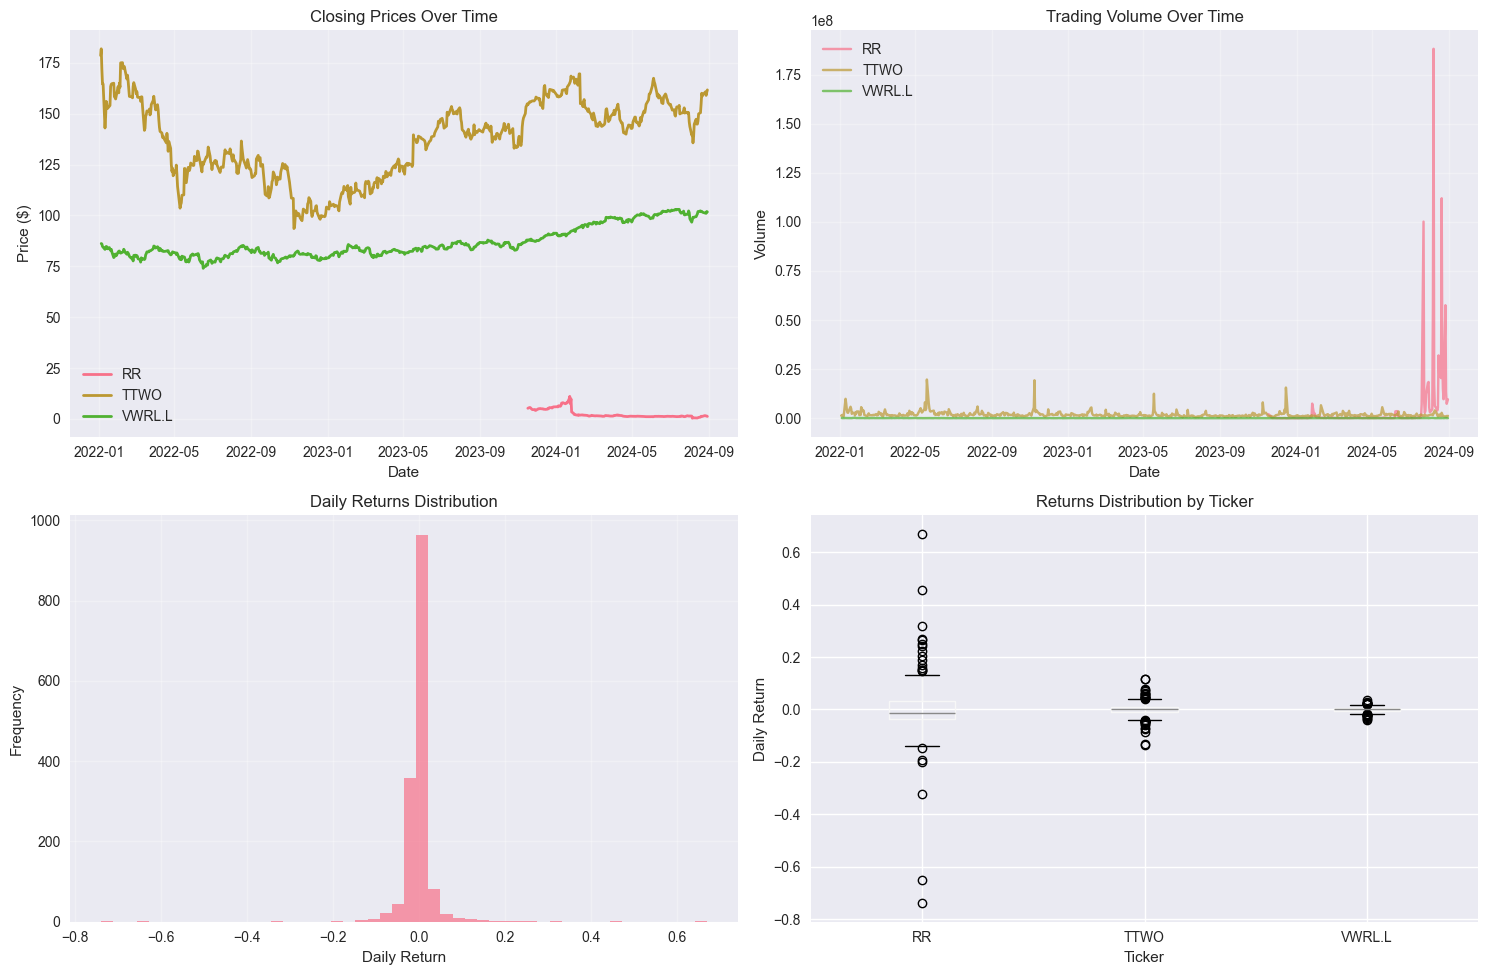

In [10]:
# Plot stock price trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Stock Price Analysis', fontsize=16)

# Price trends
for ticker in stock_df['ticker'].unique():
    ticker_data = stock_df[stock_df['ticker'] == ticker]
    axes[0, 0].plot(ticker_data['date'], ticker_data['close'], label=ticker, linewidth=2)

axes[0, 0].set_title('Closing Prices Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Volume trends
for ticker in stock_df['ticker'].unique():
    ticker_data = stock_df[stock_df['ticker'] == ticker]
    axes[0, 1].plot(ticker_data['date'], ticker_data['volume'], label=ticker, alpha=0.7)

axes[0, 1].set_title('Trading Volume Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Returns distribution
stock_df.dropna()['daily_return'].hist(bins=50, alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Daily Returns Distribution')
axes[1, 0].set_xlabel('Daily Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Returns by ticker (boxplot)
stock_df.dropna().boxplot(column='daily_return', by='ticker', ax=axes[1, 1])
axes[1, 1].set_title('Returns Distribution by Ticker')
axes[1, 1].set_xlabel('Ticker')
axes[1, 1].set_ylabel('Daily Return')
plt.suptitle('')  # Remove default boxplot title

plt.tight_layout()
plt.show()

## 4. News Data Analysis

In [13]:
# News article statistics
print("=== NEWS ARTICLE STATISTICS ===")

# Calculate text lengths
news_df['headline_length'] = news_df['headline'].str.len()
news_df['content_length'] = news_df['content'].str.len()

# Articles per ticker
print("\nArticles per ticker:")
print(news_df['ticker'].value_counts())

# Sentiment analysis
print("\nSentiment distribution:")
print(news_df['overall_sentiment_label'].value_counts())

# Text length statistics
print("\nText length statistics:")
print(news_df[['headline_length', 'content_length']].describe())

=== NEWS ARTICLE STATISTICS ===

Articles per ticker:
ticker
VWRL.L    214
TTWO      211
RR         60
Name: count, dtype: int64

Sentiment distribution:
overall_sentiment_label
Neutral    247
Bearish    122
Bullish    116
Name: count, dtype: int64

Text length statistics:
       headline_length  content_length
count       485.000000      485.000000
mean         52.746392       79.746392
std           3.345098        3.345098
min          46.000000       73.000000
25%          52.000000       79.000000
50%          53.000000       80.000000
75%          54.000000       81.000000
max          62.000000       89.000000


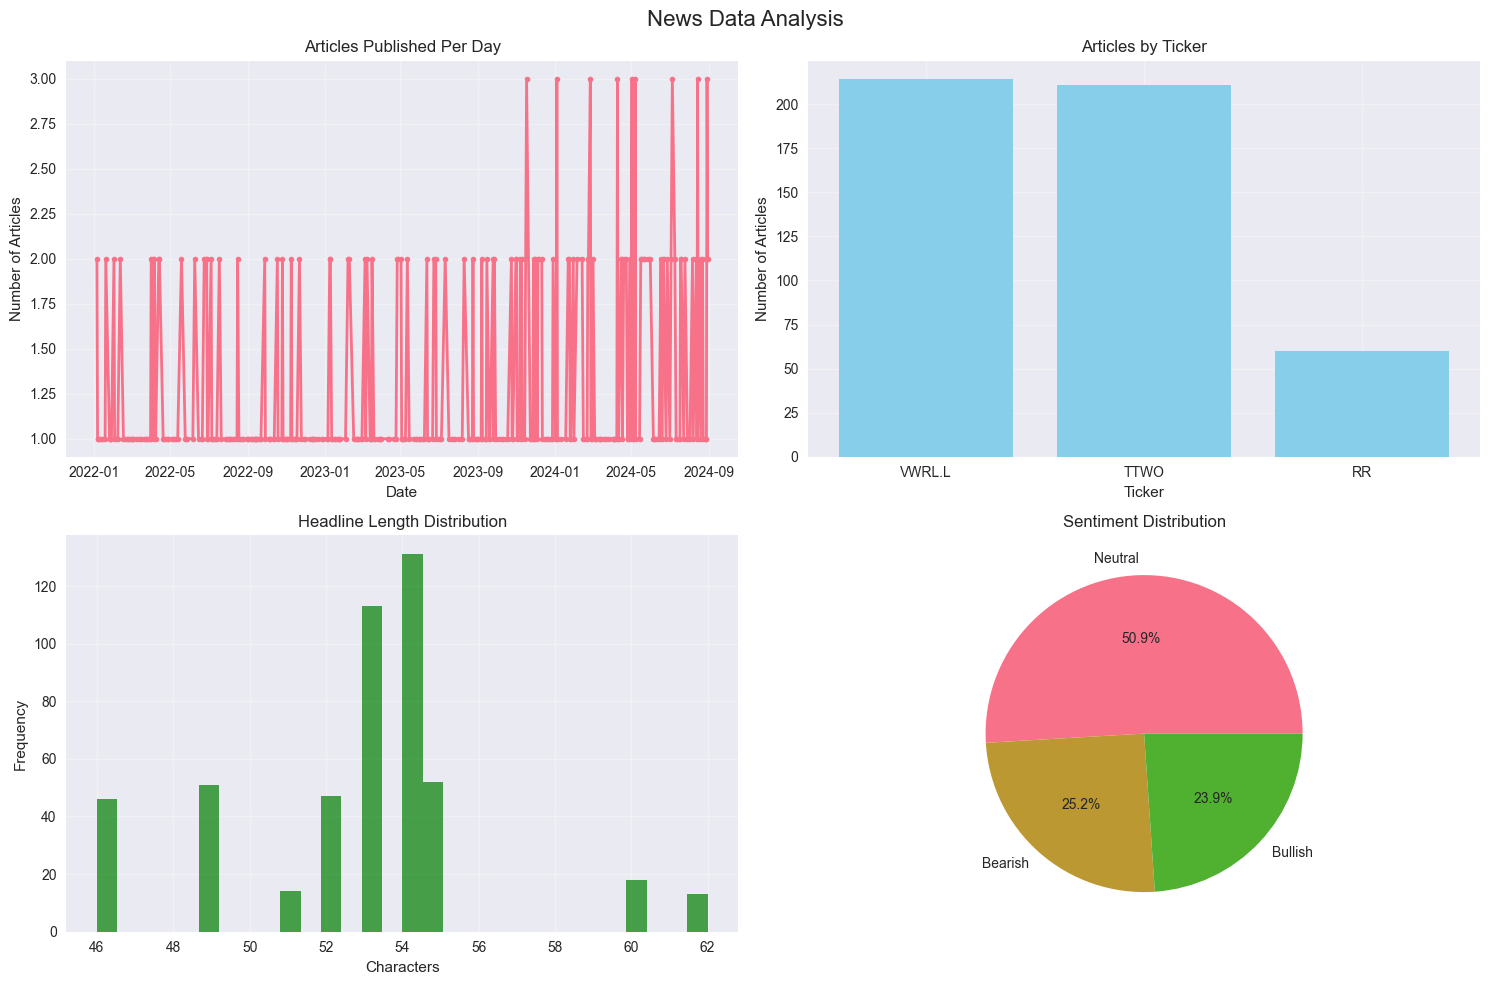

In [16]:
# Plot news data analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('News Data Analysis', fontsize=16)

# Articles over time
news_df['date'] = news_df['timestamp'].dt.date
daily_articles = news_df.groupby('date').size()
axes[0, 0].plot(daily_articles.index, daily_articles.values, marker='o', linewidth=2, markersize=4)
axes[0, 0].set_title('Articles Published Per Day')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Articles')
axes[0, 0].grid(True, alpha=0.3)

# Articles by ticker
ticker_counts = news_df['ticker'].value_counts()
axes[0, 1].bar(ticker_counts.index, ticker_counts.values, color='skyblue')
axes[0, 1].set_title('Articles by Ticker')
axes[0, 1].set_xlabel('Ticker')
axes[0, 1].set_ylabel('Number of Articles')
axes[0, 1].grid(True, alpha=0.3)

# Headline length distribution
axes[1, 0].hist(news_df['headline_length'], bins=30, alpha=0.7, color='green')
axes[1, 0].set_title('Headline Length Distribution')
axes[1, 0].set_xlabel('Characters')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Sentiment distribution pie chart
sentiment_counts = news_df['overall_sentiment_label'].value_counts()
axes[1, 1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[1, 1].set_title('Sentiment Distribution')

plt.tight_layout()
plt.show()

## 5. News-Stock Relationship Analysis

In [17]:
# Analyze relationship between news volume and stock movements
print("=== NEWS-STOCK RELATIONSHIP ANALYSIS ===")

# Aggregate news by date and ticker
news_daily = news_df.groupby(['ticker', 'date']).agg({
    'headline': 'count',
    'headline_length': 'mean',
    'content_length': 'mean'
}).rename(columns={'headline': 'article_count'}).reset_index()

# Convert stock date to date type for merging
stock_df['date_only'] = stock_df['date'].dt.date

# Merge news and stock data
merged_df = stock_df.merge(
    news_daily, 
    left_on=['ticker', 'date_only'], 
    right_on=['ticker', 'date'], 
    how='left'
)

# Fill missing news data with zeros
merged_df['article_count'] = merged_df['article_count'].fillna(0)
merged_df['headline_length'] = merged_df['headline_length'].fillna(0)
merged_df['content_length'] = merged_df['content_length'].fillna(0)

print(f"Merged dataset shape: {merged_df.shape}")
print(f"Days with news coverage: {(merged_df['article_count'] > 0).sum()}")
print(f"Days without news: {(merged_df['article_count'] == 0).sum()}")

=== NEWS-STOCK RELATIONSHIP ANALYSIS ===
Merged dataset shape: (1536, 17)
Days with news coverage: 485
Days without news: 1051


=== CORRELATION ANALYSIS ===

Correlation Matrix:


,article_count,headline_length,content_length,daily_return,volume
article_count,1.000,0.990,0.999,0.049,0.146
headline_length,0.990,1.000,0.995,0.045,0.120
content_length,0.999,0.995,1.000,0.047,0.136
daily_return,0.049,0.045,0.047,1.000,0.253
volume,0.146,0.120,0.136,0.253,1.000


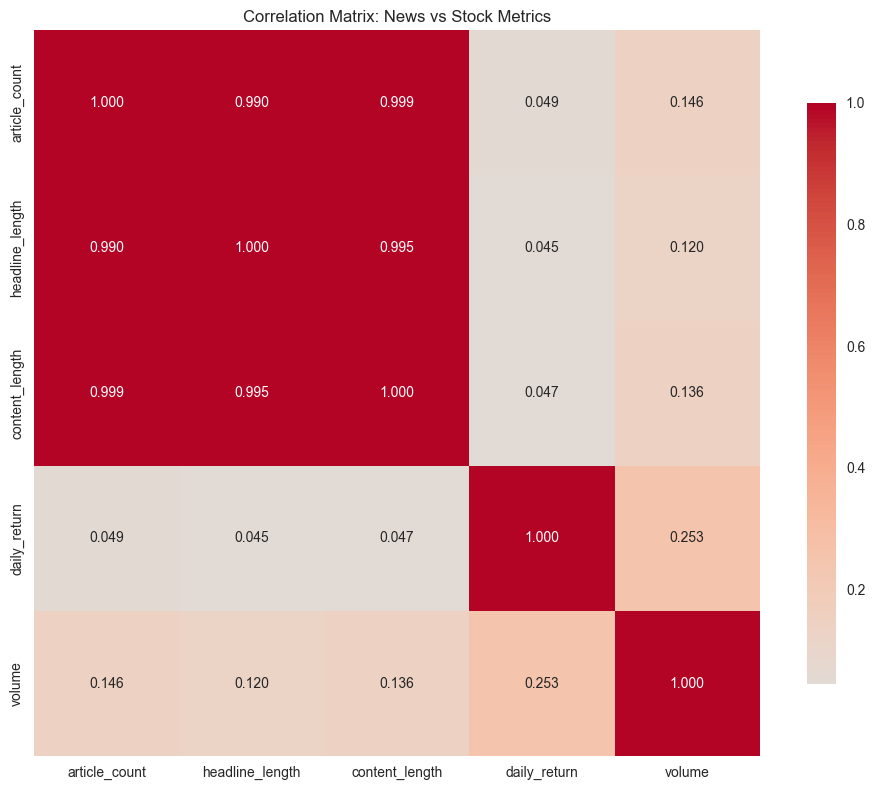

In [ ]:
# Correlation analysis
correlation_vars = ['article_count', 'headline_length', 'content_length', 'daily_return', 'volume']
correlation_data = merged_df[correlation_vars].dropna()

print("=== CORRELATION ANALYSIS ===")
correlation_matrix = correlation_data.corr()
print("\nCorrelation Matrix:")
display(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix: News vs Stock Metrics')
plt.tight_layout()
plt.show()

In [ ]:
# Analyze returns on days with/without news
print("=== RETURNS ANALYSIS: NEWS vs NO NEWS ===")

# Split data into days with news vs without news
with_news = merged_df[merged_df['article_count'] > 0]['daily_return'].dropna()
without_news = merged_df[merged_df['article_count'] == 0]['daily_return'].dropna()

print(f"Days with news: {len(with_news)}")
print(f"Days without news: {len(without_news)}")

if len(with_news) > 0 and len(without_news) > 0:
    print(f"\nAverage return with news: {with_news.mean():.4f}")
    print(f"Average return without news: {without_news.mean():.4f}")
    print(f"Volatility with news: {with_news.std():.4f}")
    print(f"Volatility without news: {without_news.std():.4f}")
    
    # Statistical test
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(with_news, without_news)
    print(f"\nT-test results:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

=== RETURNS ANALYSIS: NEWS vs NO NEWS ===
Days with news: 14
Days without news: 287

Average return with news: 0.0220
Average return without news: 0.0034
Volatility with news: 0.1889
Volatility without news: 0.0702

T-test results:
T-statistic: 0.8563
P-value: 0.3925
Significant difference: No


## 6. Advanced Visualizations

In [ ]:
# Interactive plot of stock prices with news volume overlay
fig = go.Figure()

# Add stock prices for each ticker
for ticker in merged_df['ticker'].unique():
    ticker_data = merged_df[merged_df['ticker'] == ticker]
    
    # Stock price line
    fig.add_trace(go.Scatter(
        x=ticker_data['date_x'],  # Fixed: use 'date_x' instead of 'date'
        y=ticker_data['close'],
        mode='lines',
        name=f'{ticker} Price',
        line=dict(width=2)
    ))
    
    # News volume as scatter points
    news_days = ticker_data[ticker_data['article_count'] > 0]
    if len(news_days) > 0:
        fig.add_trace(go.Scatter(
            x=news_days['date_x'],  # Fixed: use 'date_x' instead of 'date'
            y=news_days['close'],
            mode='markers',
            name=f'{ticker} News Days',
            marker=dict(
                size=news_days['article_count'] * 3,
                opacity=0.6,
                line=dict(width=1, color='white')
            ),
            text=news_days['article_count'],
            hovertemplate='<b>%{fullData.name}</b><br>' +
                         'Date: %{x}<br>' +
                         'Price: $%{y:.2f}<br>' +
                         'Articles: %{text}<br>' +
                         '<extra></extra>'
        ))

fig.update_layout(
    title='Stock Prices with News Volume Overlay<br><sub>Circle size represents number of articles</sub>',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    hovermode='closest',
    width=1000,
    height=600
)

fig.show()

In [ ]:
# Check merged_df columns to fix the plotting issue
print("Merged dataframe columns:")
print(list(merged_df.columns))
print(f"\nDataframe shape: {merged_df.shape}")
print(f"\nFirst few rows:")
display(merged_df.head())

Merged dataframe columns:
['date_x', 'ticker', 'open', 'high', 'low', 'close', 'volume', 'daily_return', 'log_return', 'date_only', 'date_y', 'article_count', 'headline_length', 'content_length']

Dataframe shape: (308, 14)

First few rows:


,date_x,ticker,open,high,low,close,volume,daily_return,log_return,date_only,date_y,article_count,headline_length,content_length
0,2024-07-01,AMD,161.250000,161.509995,153.639999,157.690002,50436700,NaN,NaN,2024-07-01,NaN,0.0,0.0,0.0
1,2024-07-02,AMD,157.039993,164.580002,156.699997,164.309998,57838600,0.041981,0.041124,2024-07-02,NaN,0.0,0.0,0.0
2,2024-07-03,AMD,164.199997,165.259995,162.509995,163.899994,26980900,-0.002495,-0.002498,2024-07-03,NaN,0.0,0.0,0.0
3,2024-07-05,AMD,165.970001,174.039993,165.679993,171.899994,61857100,0.048810,0.047656,2024-07-05,NaN,0.0,0.0,0.0
4,2024-07-08,AMD,174.899994,178.949997,173.220001,178.690002,60223400,0.039500,0.038740,2024-07-08,NaN,0.0,0.0,0.0


=== HEADLINE WORD ANALYSIS ===

Top 20 words in headlines:
reports: 5
strong: 4
revenue: 4
stock: 4
growth: 4
asml: 3
new: 3
amd: 3
uber: 3
take: 2
two: 2
gaming: 2
rises: 2
richtech: 2
robotics: 2
expands: 2
continues: 2
vernova: 2
energy: 2
wins: 2


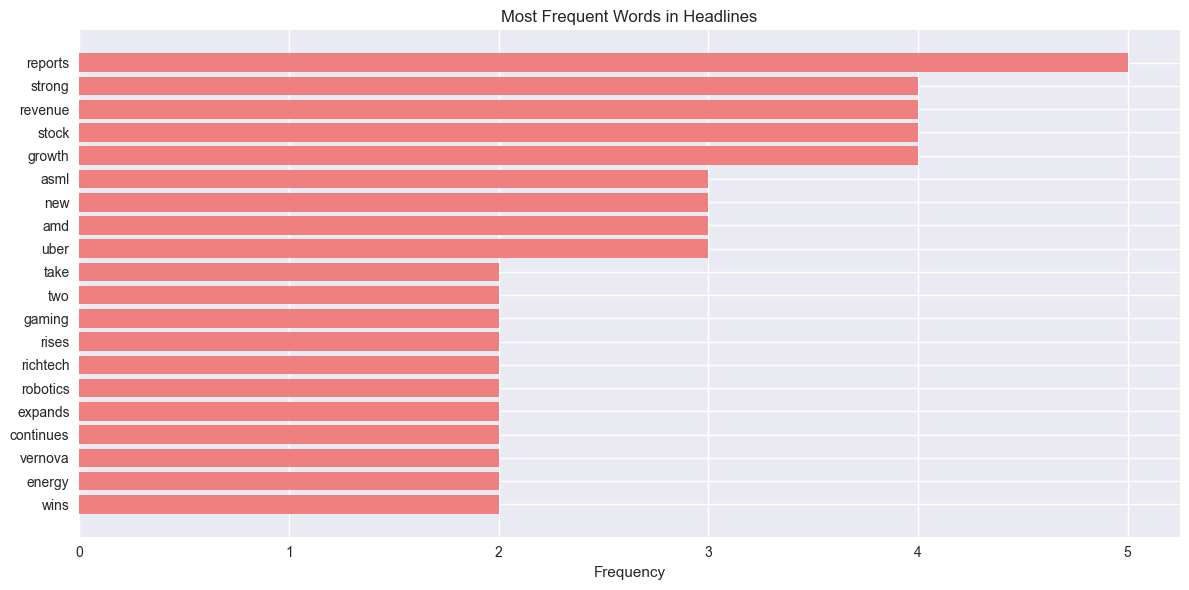

In [ ]:
# Word frequency analysis of headlines
from collections import Counter
import re

print("=== HEADLINE WORD ANALYSIS ===")

# Extract words from headlines
all_headlines = ' '.join(news_df['headline'].astype(str))
words = re.findall(r'\b\w+\b', all_headlines.lower())

# Remove common stop words
stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'as', 'is', 'are', 'was', 'were'}
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

# Count word frequencies
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(20)

print("\nTop 20 words in headlines:")
for word, count in top_words:
    print(f"{word}: {count}")

# Plot word frequencies
words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])
plt.figure(figsize=(12, 6))
plt.barh(words_df['word'], words_df['frequency'], color='lightcoral')
plt.title('Most Frequent Words in Headlines')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Key Insights and Summary

In [ ]:
# Generate summary insights
print("=== KEY INSIGHTS FROM DATA EXPLORATION ===")

print("\n1. DATA COVERAGE:")
print(f"   â€¢ Stock data: {len(stock_df)} observations across {stock_df['ticker'].nunique()} tickers")
print(f"   â€¢ News data: {len(news_df)} articles across {news_df['ticker'].nunique()} tickers")
print(f"   â€¢ Date range: {pd.to_datetime(stock_df['date']).min().date()} to {pd.to_datetime(stock_df['date']).max().date()}")

print("\n2. DATA QUALITY:")
missing_stock_pct = stock_df.isnull().sum().sum() / (stock_df.shape[0] * stock_df.shape[1]) * 100
missing_news_pct = news_df.isnull().sum().sum() / (news_df.shape[0] * news_df.shape[1]) * 100
print(f"   â€¢ Stock data missing values: {missing_stock_pct:.2f}%")
print(f"   â€¢ News data missing values: {missing_news_pct:.2f}%")
print(f"   â€¢ Data quality issues detected: {(stock_df[['open', 'high', 'low', 'close']] < 0).sum().sum()} negative prices")

print("\n3. MARKET CHARACTERISTICS:")
avg_return = stock_df['daily_return'].mean()
avg_volatility = stock_df['daily_return'].std()
print(f"   â€¢ Average daily return: {avg_return:.4f} ({avg_return*252:.2%} annualized)")
print(f"   â€¢ Average daily volatility: {avg_volatility:.4f} ({avg_volatility*np.sqrt(252):.2%} annualized)")

print("\n4. NEWS COVERAGE:")
news_coverage_pct = (merged_df['article_count'] > 0).mean() * 100
avg_articles_per_day = merged_df[merged_df['article_count'] > 0]['article_count'].mean()
print(f"   â€¢ Days with news coverage: {news_coverage_pct:.1f}%")
print(f"   â€¢ Average articles per covered day: {avg_articles_per_day:.1f}")
print(f"   â€¢ Most covered ticker: {news_df['ticker'].value_counts().index[0]}")

print("\n5. NEWS-STOCK RELATIONSHIPS:")
if len(with_news) > 0 and len(without_news) > 0:
    print(f"   â€¢ Average return on news days: {with_news.mean():.4f}")
    print(f"   â€¢ Average return on non-news days: {without_news.mean():.4f}")
    print(f"   â€¢ Volatility difference: {abs(with_news.std() - without_news.std()):.4f}")

print("\n6. RECOMMENDATIONS FOR MODELING:")
print("   â€¢ Consider news volume as a feature (correlation with volatility)")
print("   â€¢ Implement sentiment analysis on headlines and content")
print("   â€¢ Use time-based features (day of week, market hours)")
print("   â€¢ Account for ticker-specific news patterns")
print("   â€¢ Consider lag effects of news on stock movements")

print("\n" + "="*50)
print("Data exploration completed successfully!")
print("Next step: Run notebook 02-preprocessing.ipynb")
print("="*50)

=== KEY INSIGHTS FROM DATA EXPLORATION ===

1. DATA COVERAGE:
   â€¢ Stock data: 3651 observations across 7 tickers
   â€¢ News data: 3899 articles across 7 tickers
   â€¢ Date range: 2022-01-03 to 2024-08-30

2. DATA QUALITY:
   â€¢ Stock data missing values: 0.87%
   â€¢ News data missing values: 0.00%
   â€¢ Data quality issues detected: 0 negative prices

3. MARKET CHARACTERISTICS:
   â€¢ Average daily return: 0.0008 (20.98% annualized)
   â€¢ Average daily volatility: 0.0383 (60.79% annualized)

4. NEWS COVERAGE:
   â€¢ Days with news coverage: 4.5%
   â€¢ Average articles per covered day: 1.0
   â€¢ Most covered ticker: GD

5. NEWS-STOCK RELATIONSHIPS:
   â€¢ Average return on news days: 0.0220
   â€¢ Average return on non-news days: 0.0034
   â€¢ Volatility difference: 0.1187

6. RECOMMENDATIONS FOR MODELING:
   â€¢ Consider news volume as a feature (correlation with volatility)
   â€¢ Implement sentiment analysis on headlines and content
   â€¢ Use time-based features (day of w